In [ ]:
import pyts

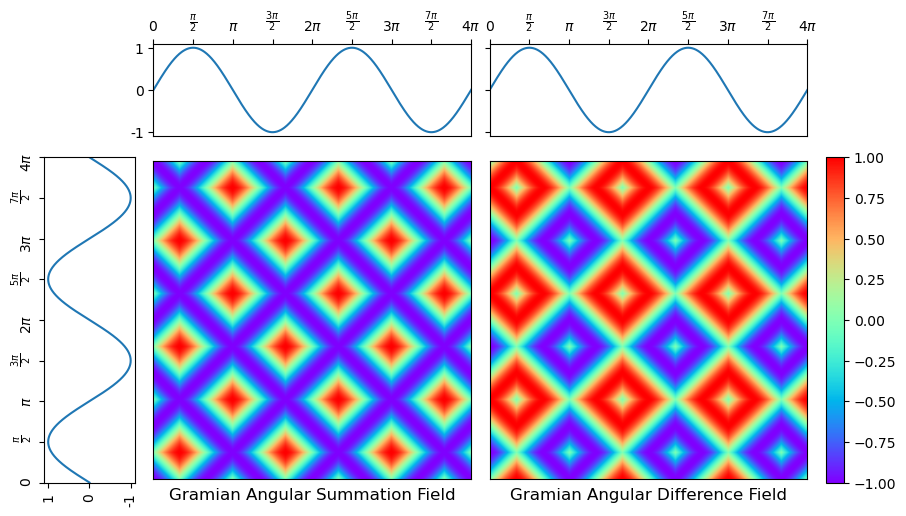

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

time_points = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

# Plot the time series and its recurrence plot
width_ratios = (2, 7, 7, 0.4)
height_ratios = (2, 7)
width = 10
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.1)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top1 = fig.add_subplot(gs[0, 1])
ax_top2 = fig.add_subplot(gs[0, 2])
for ax in (ax_top1, ax_top2):
    ax.plot(time_points, x)
    ax.set_xticks(time_ticks)
    ax.set_xticklabels(time_ticklabels)
    ax.set_yticks(value_ticks)
    ax.xaxis.tick_top()
    ax.set_xlim((0, 4 * np.pi))
ax_top1.set_yticklabels(value_ticks)
ax_top2.set_yticklabels([])

# Plot the Gramian angular fields on the bottom right
ax_gasf = fig.add_subplot(gs[1, 1])
ax_gasf.imshow(X_gasf[0], cmap='rainbow', origin='lower',
               extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gasf.set_xticks([])
ax_gasf.set_yticks([])
ax_gasf.set_title('Gramian Angular Summation Field', y=-0.09)

ax_gadf = fig.add_subplot(gs[1, 2])
im = ax_gadf.imshow(X_gadf[0], cmap='rainbow', origin='lower',
                    extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gadf.set_xticks([])
ax_gadf.set_yticks([])
ax_gadf.set_title('Gramian Angular Difference Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 3])
fig.colorbar(im, cax=ax_cbar)

plt.show()